In [54]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import levene

Definition of confounding variable: (1) they affect the dependent variable and (2) the groups differ on the confounding variable.$\newline$, 3) They cannot be part of causal link between Dependent and Indepoendent

Analysis Plan:$\newline$

Step 1) Test wether or not there is a significant difference in the two groups without controlling for potential confounds.$\newline$

Step 2) Check for potential confounding variables. We use significance testing and correlation tests to see if 1) the there is a correlation between the potential confound and the dependent variable, and 2), to see if there is a correlation between the potential confound and the idependent variable.$\newline$

Step 3) If not a confound, we forget about it and start over.$\newline$

Step 4) If it is a confound, we will control for it using stratification and see what has changed between the relationship between the independent variable and the dependent variable.$\newline$

NOTE: To avoid Type 1 errors, we set alpha = .005. Also, to avoid p-hacking, we stick with a plan to divide subgroups for stratification within each question and use the same grouping throughout the problem. We will use the median split for this problem.


In [55]:
'''
Columns are:
1. Average Rating (the arithmetic mean of all individual quality ratings of this professor)
2. Average Difficulty (the arithmetic mean of all individual difficulty ratings of this professor)
3. Number of ratings (simply the total number of ratings these averages are based on)
4. Received a “pepper”? (Boolean - was this professor judged as “hot” by the students?)
5. The proportion of students that said they would take the class again
6. The number of ratings coming from online classes
7. Male gender (Boolean – 1: determined with high confidence that professor is male)
8. Female (Boolean – 1: determined with high confidence that professor is female)
'''
numDat = pd.read_csv('rmpCapstoneNum.csv', header=None)
numDat.columns = ['Average Rating', 'Average Difficulty', 'Number of ratings', 'Received a pepper', 
                       'Proportion of students that said they would take the class again', 
                       'Number of ratings coming from online classes', 'Male Professor', 'Female Professor']

2.) Is there a gender difference in the spread (variance/dispersion) of the ratings distribution?

The Null Hyp: There is no difference in the distribution of the variance of the distribution of Average Ratings among Men and Women professors.$\newline$

Alternate Hyp: There is a significant difference between the variance of the distribution of average ratings between Men and Women.

Plan for stratification grouping is to use median. Levenes test does not require evenly spaced groups.

First, we only consider professors with at least 10 ratings, and we only consider those with high confidence gender

In [56]:
# Keep rows where 'Number of ratings' is greater or equal to 10
numDat = numDat.loc[numDat['Number of ratings'] >= 10]

# Remove rows where 'Male Professor' and 'Female Professor' are both 0 or both 1
numDat = numDat.loc[
    ~((numDat['Male Professor'] == 0) & (numDat['Female Professor'] == 0)) &
    ~((numDat['Male Professor'] == 1) & (numDat['Female Professor'] == 1))
]

# Display the final filtered dataset
numDat

,Average Rating,Average Difficulty,Number of ratings,Received a pepper,Proportion of students that said they would take the class again,Number of ratings coming from online classes,Male Professor,Female Professor
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0
21,2.6,4.1,10.0,0.0,NaN,0.0,1,0
25,4.3,3.3,16.0,1.0,83.0,0.0,0,1
39,3.5,3.2,20.0,1.0,NaN,0.0,1,0
40,1.8,3.8,15.0,0.0,22.0,1.0,0,1
...,...,...,...,...,...,...,...,...
89810,3.4,3.4,14.0,0.0,54.0,5.0,1,0
89841,4.2,3.8,11.0,0.0,NaN,0.0,0,1
89855,4.0,1.9,11.0,1.0,60.0,0.0,1,0
89866,4.4,3.6,14.0,1.0,88.0,0.0,0,1


We first visualize the variation in the distributions among men and women

In [57]:
# Create DataFrames for Male and Female Professors
numDat_male = numDat[numDat['Male Professor'] == 1]
numDat_female = numDat[numDat['Female Professor'] == 1]

In [58]:
numDat_male.describe()

,Average Rating,Average Difficulty,Number of ratings,Received a pepper,Proportion of students that said they would take the class again,Number of ratings coming from online classes,Male Professor,Female Professor
count,3987.000000,3987.000000,3987.000000,3987.000000,3357.000000,3987.000000,3987.0,3987.0
mean,3.964184,2.940030,18.892902,0.482318,78.855824,0.653373,1.0,0.0
std,0.857271,0.769503,16.879471,0.499750,23.712334,1.938917,0.0,0.0
min,1.000000,1.000000,10.000000,0.000000,4.000000,0.000000,1.0,0.0
25%,3.500000,2.400000,11.000000,0.000000,67.000000,0.000000,1.0,0.0
50%,4.300000,2.900000,14.000000,0.000000,86.000000,0.000000,1.0,0.0
75%,4.600000,3.500000,20.000000,1.000000,100.000000,0.000000,1.0,0.0
max,5.000000,5.000000,393.000000,1.000000,100.000000,19.000000,1.0,0.0


In [59]:
numDat_female.describe()

,Average Rating,Average Difficulty,Number of ratings,Received a pepper,Proportion of students that said they would take the class again,Number of ratings coming from online classes,Male Professor,Female Professor
count,3118.000000,3118.000000,3118.000000,3118.000000,2606.000000,3118.000000,3118.0,3118.0
mean,3.888775,2.946985,17.611931,0.509942,76.599770,0.878768,0.0,1.0
std,0.898383,0.765935,13.335368,0.499981,24.699061,2.260269,0.0,0.0
min,1.000000,1.000000,10.000000,0.000000,5.000000,0.000000,0.0,1.0
25%,3.400000,2.400000,11.000000,0.000000,63.000000,0.000000,0.0,1.0
50%,4.200000,2.900000,14.000000,1.000000,83.000000,0.000000,0.0,1.0
75%,4.600000,3.500000,19.000000,1.000000,100.000000,1.000000,0.0,1.0
max,5.000000,5.000000,247.000000,1.000000,100.000000,19.000000,0.0,1.0


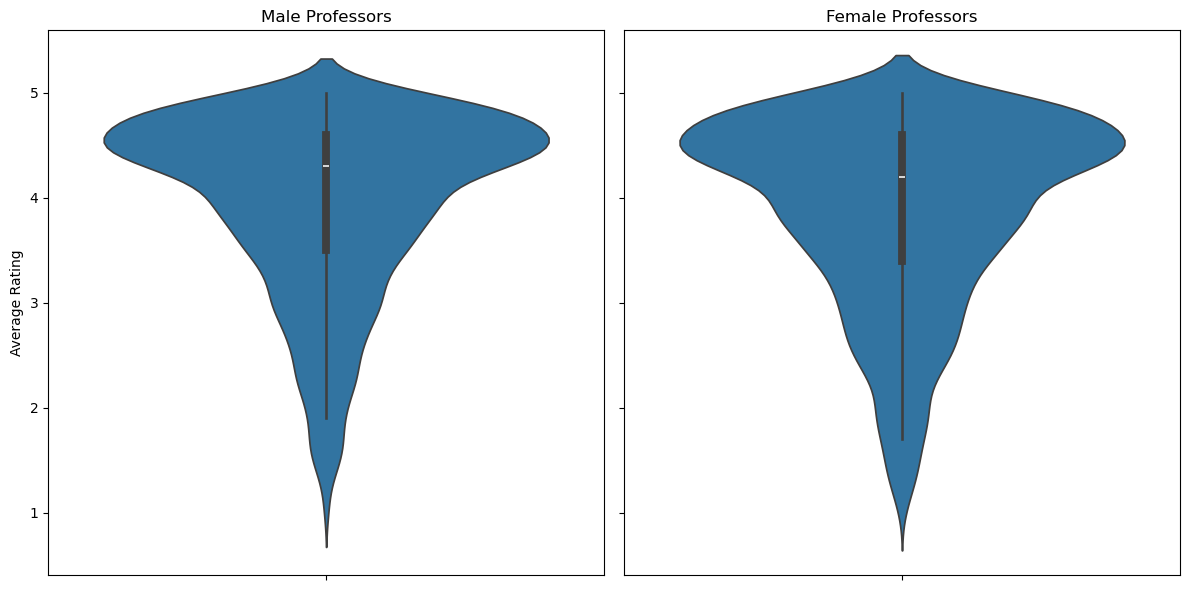

In [60]:
# Create subplots for violin plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Violin plot for Male Professors
sns.violinplot(ax=axes[0], y=numDat_male['Average Rating'])
axes[0].set_title('Male Professors')
axes[0].set_ylabel('Average Rating')

# Violin plot for Female Professors
sns.violinplot(ax=axes[1], y=numDat_female['Average Rating'])
axes[1].set_title('Female Professors')

# Overall adjustments
plt.tight_layout()
plt.show()

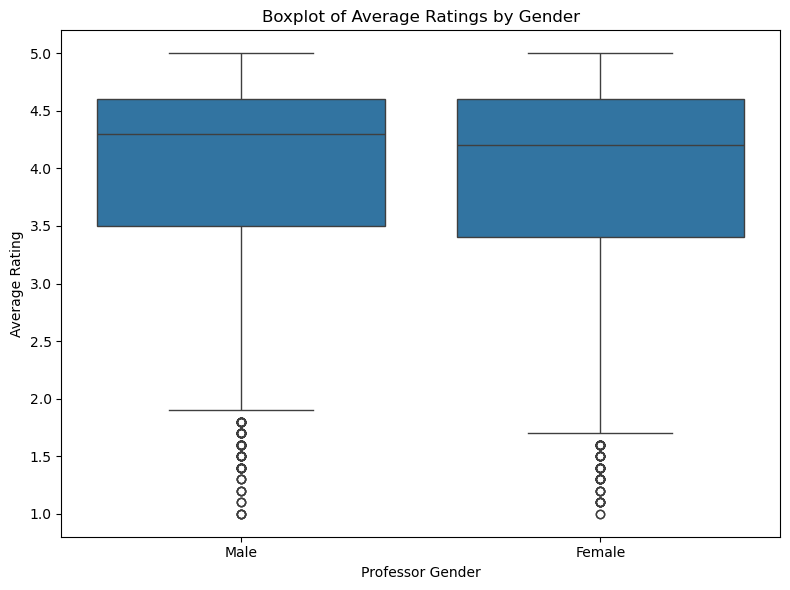

In [61]:
# Filter data for Male and Female Professors
numDat_male = numDat[numDat['Male Professor'] == 1].copy()
numDat_female = numDat[numDat['Female Professor'] == 1].copy()

# Add Gender column
numDat_male['Gender'] = 'Male'
numDat_female['Gender'] = 'Female'

# Concatenate both dataframes
boxplot_data = pd.concat([numDat_male, numDat_female])

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Average Rating', data=boxplot_data)

# Add title and labels
plt.title('Boxplot of Average Ratings by Gender')
plt.xlabel('Professor Gender')
plt.ylabel('Average Rating')

# Show the plot
plt.tight_layout()
plt.show()

Lets test the difference in variance before we consider confounds

In [62]:
# Filter data for Male and Female Professors
numDat_male = numDat[numDat['Male Professor'] == 1]
numDat_female = numDat[numDat['Female Professor'] == 1]

# Extract Average Ratings for Male and Female Professors
ratings_male = numDat_male['Average Rating']
ratings_female = numDat_female['Average Rating']

# Perform Levene's Test
stat, p_value = levene(ratings_male, ratings_female)

# Display the results
print(f"Levene's Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.005:  # Using significance level of 0.005
    print("The variances are significantly different (reject the null hypothesis).")
else:
    print("The variances are not significantly different (fail to reject the null hypothesis).")

Levene's Test Statistic: 9.2405
P-value: 0.0024
The variances are significantly different (reject the null hypothesis).


Here we see that the variance in the distributions of average rating among men and women is significantly different.$\newline$
This does not necessarily imply that gender is the CAUSE of this difference.$\newline$
To investigate gender bias, we will test the impact of the potential confounds.

What are potential confounds in our data? Number of ratings, Average Difficulty, the number of ratings from online courses, and finally if the professor received a pepper.

#### Number of Rating as a confound

Does number of ratings impact the variance of distributions of average rating of professors?$\newline$ Is there a difference between the number of ratings among male and female professors?

Using Sig Test and correlation level to test the potential confound:$\newline$

The null hypothesis: None of the 4 groups have significantly different variances in their distributions.$\newline$

The alternative hypothesis: At least one group has a variance that is significantly different from the others.$\newline$
If the p-value is less than the significance level (e.g., 0.005), you reject the null hypothesis and conclude that there are significant differences in variances across the groups.

Levene's Test Statistic: 8.6050, P-value: 0.0034
The variances are significantly different (reject the null hypothesis).


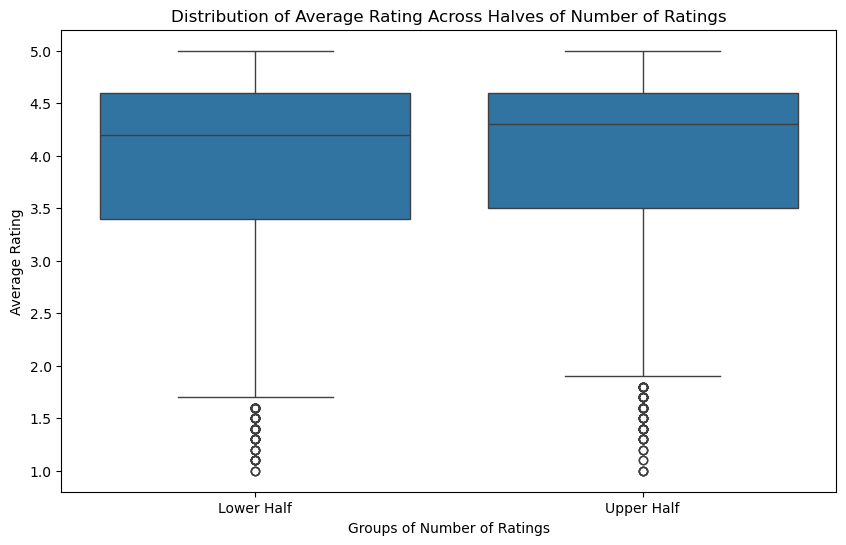

In [63]:
# Step 1: Create Two Groups (Half and Half) for Number of Ratings
numDat['Ratings Group'] = pd.qcut(
    numDat['Number of ratings'], 
    q=2,  # Divide into 2 groups
    labels=['Lower Half', 'Upper Half']
)

# Step 2: Extract Distributions of Average Rating for Each Group
group_distributions = [
    numDat[numDat['Ratings Group'] == group]['Average Rating']
    for group in numDat['Ratings Group'].unique()
]

# Step 3: Perform Levene's Test to Compare Variances of Average Rating Between Groups
stat, p_value = levene(*group_distributions)  # Unpack the list of distributions
print(f"Levene's Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.005:
    print("The variances are significantly different (reject the null hypothesis).")
else:
    print("The variances are not significantly different (fail to reject the null hypothesis).")

# Step 4: Visualize the Distributions Using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratings Group', y='Average Rating', data=numDat)
plt.title('Distribution of Average Rating Across Halves of Number of Ratings')
plt.xlabel('Groups of Number of Ratings')
plt.ylabel('Average Rating')
plt.show()


The Number of Ratings significantly impacts the variance of the distributions of Average Rating.$\newline$

In [65]:
# Calculate the correlation
correlation = numDat['Number of ratings'].corr(numDat['Average Rating'])

# Print the result
print(f"Correlation between Number of Ratings and Average Rating: {correlation:.4f}")

Correlation between Number of Ratings and Average Rating: 0.0545


In [69]:
# Calculate the mean Number of Ratings for Male and Female Professors
mean_male = numDat[numDat['Male Professor'] == 1]['Number of ratings'].mean()
mean_female = numDat[numDat['Female Professor'] == 1]['Number of ratings'].mean()

# Print the results
print(f"Mean Number of Ratings for Male Professors: {mean_male:.2f}")
print(f"Mean Number of Ratings for Female Professors: {mean_female:.2f}")

Mean Number of Ratings for Male Professors: 18.89
Mean Number of Ratings for Female Professors: 17.61


Here we see that Number of Ratings in a confound because its related to both the Dependent variable (Variance of distribution of average rating) and the Independent variable (Female and Male) 

#### Number of ratings coming from online classes as a confound

Does number of ratings coming from online classes impact the distributions of average rating of professors?

In [17]:
print(numDat['Number of ratings coming from online classes'].describe())

count    5963.000000
mean        0.821231
std         2.201728
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        19.000000
Name: Number of ratings coming from online classes, dtype: float64


In [18]:
# Step 1: Split data into two groups
online_ratings_0 = numDat[numDat['Number of ratings coming from online classes'] == 0]
online_ratings_1plus = numDat[numDat['Number of ratings coming from online classes'] >= 1]

# Step 2: Extract Average Ratings for Each Group
ratings_0 = online_ratings_0['Average Rating']
ratings_1plus = online_ratings_1plus['Average Rating']

# Step 3: Perform Levene's Test
if len(ratings_0) > 1 and len(ratings_1plus) > 1:  # Ensure sufficient data for the test
    stat, p_value = levene(ratings_0, ratings_1plus)
    print(f"Levene's Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")
    
    # Interpretation
    if p_value < 0.005:
        print("The variances are significantly different (reject the null hypothesis).")
    else:
        print("The variances are not significantly different (fail to reject the null hypothesis).")
else:
    print("Not enough data for one or both groups to perform Levene's test.")

Levene's Test Statistic: 2.1937, P-value: 0.1386
The variances are not significantly different (fail to reject the null hypothesis).


In [19]:
# Calculate the Pearson correlation
correlation = numDat['Number of ratings coming from online classes'].corr(numDat['Average Rating'])

# Print the result
print(f"Pearson Correlation between Number of Ratings from Online Classes and Average Rating: {correlation:.4f}")

Pearson Correlation between Number of Ratings from Online Classes and Average Rating: 0.0017


Here we see that when we consider Online classes there is no difference in the variation of the distributions of average ratings.$\newline$ Additionally, there is very week correlation.$\newline$ We conclude that Number of ratings coming from online classes is not a likely confound.

#### Average Difficulty as a Confound

Does average difficulty impact the distributions of average rating of professors?

In [20]:
numDat['Average Difficulty'].describe()

count    5963.000000
mean        2.931092
std         0.740288
min         1.000000
25%         2.400000
50%         2.900000
75%         3.500000
max         5.000000
Name: Average Difficulty, dtype: float64

In [21]:
numDat

,Average Rating,Average Difficulty,Number of ratings,Received a pepper,Proportion of students that said they would take the class again,Number of ratings coming from online classes,Male Professor,Female Professor,Ratings Quartile,Proportion Groups
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0,Q4 (Highest),0-64
25,4.3,3.3,16.0,1.0,83.0,0.0,0,1,Q3,65-86
40,1.8,3.8,15.0,0.0,22.0,1.0,0,1,Q3,0-64
42,4.1,3.3,21.0,0.0,67.0,0.0,0,1,Q4 (Highest),65-86
46,4.2,1.8,26.0,1.0,57.0,8.0,1,0,Q4 (Highest),0-64
...,...,...,...,...,...,...,...,...,...,...
89801,4.8,2.8,13.0,1.0,100.0,0.0,0,1,Q2,87-100
89810,3.4,3.4,14.0,0.0,54.0,5.0,1,0,Q2,0-64
89855,4.0,1.9,11.0,1.0,60.0,0.0,1,0,Q1 (Lowest),0-64
89866,4.4,3.6,14.0,1.0,88.0,0.0,0,1,Q2,87-100


In [75]:
# Calculate the median of Average Difficulty
median_difficulty = numDat['Average Difficulty'].median()

# Create Difficulty Groups using the median
numDat['Difficulty Groups'] = pd.cut(
    numDat['Average Difficulty'],
    bins=[numDat['Average Difficulty'].min(), median_difficulty, numDat['Average Difficulty'].max()],
    labels=[f'Below Median (≤{median_difficulty:.2f})', f'Above Median (> {median_difficulty:.2f})'],
    include_lowest=True
)

/var/folders/n6/6_dwq_bx4v7_20bszmc0y28w0000gn/T/ipykernel_9322/2094907362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numDat['Difficulty Groups'] = pd.cut(


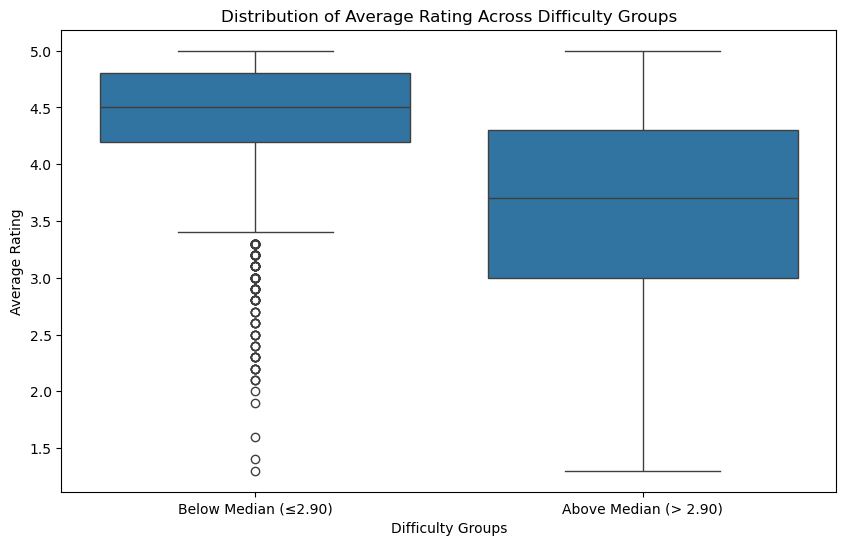

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Difficulty Groups', y='Average Rating', data=numDat)
plt.title('Distribution of Average Rating Across Difficulty Groups')
plt.xlabel('Difficulty Groups')
plt.ylabel('Average Rating')
plt.show()

In [78]:
# Step 2: Get all unique group names
groups = numDat['Difficulty Groups'].unique()

# Step 3: Perform Levene's Test for each pair of groups
print("Pairwise Levene's Test Results:")

# Compare groups using nested loops
for i in range(len(groups)):
    for j in range(i + 1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]

        # Extract data for the two groups
        group1_data = numDat[numDat['Difficulty Groups'] == group1]['Average Rating']
        group2_data = numDat[numDat['Difficulty Groups'] == group2]['Average Rating']
        
        # Ensure both groups have enough data points
        if len(group1_data) > 1 and len(group2_data) > 1:
            stat, p_value = levene(group1_data, group2_data)
            print(f"Comparing {group1} vs {group2}: Levene's Test Statistic = {stat:.4f}, P-value = {p_value:.4f}")
            
            # Interpretation
            if p_value < 0.005:
                print("  The variances are significantly different (reject the null hypothesis).")
            else:
                print("  The variances are not significantly different (fail to reject the null hypothesis).")
        else:
            print(f"Not enough data to compare {group1} vs {group2}.")
        print("-" * 50)


Pairwise Levene's Test Results:
Comparing Above Median (> 2.90) vs Below Median (≤2.90): Levene's Test Statistic = 922.5902, P-value = 0.0000
  The variances are significantly different (reject the null hypothesis).
--------------------------------------------------


In [79]:
# Calculate the Pearson correlation
correlation = numDat['Average Difficulty'].corr(numDat['Average Rating'])

# Print the result
print(f"Pearson Correlation between Average Difficulty and Average Rating: {correlation:.4f}")

Pearson Correlation between Average Difficulty and Average Rating: -0.6219


The Average Difficulty alone has a huge impact on the variance in the distribution of average ratings of the professors.$\newline$ Additionally, there is a large correlation,

Now we test the association between Average Difficulty and Male and Female professors.

In [26]:
# Calculate means
male_mean_diff = numDat[numDat['Male Professor'] == 1]['Average Difficulty'].mean()
female_mean_diff = numDat[numDat['Female Professor'] == 1]['Average Difficulty'].mean()

# Print results
print(f"Mean Average Difficulty for Male Professors: {male_mean_diff:.4f}")
print(f"Mean Average Difficulty for Female Professors: {female_mean_diff:.4f}")


Mean Average Difficulty for Male Professors: 2.9368
Mean Average Difficulty for Female Professors: 2.9238


While the means are close, we know that the Average Difficulty greatly affects the variance in distribution of ratings, so we will consider it a confound

We will now control for the confound.

#### Does Pepper versus No Pepper impact the distributions of average rating of professors?

In [31]:
# Step 1: Split the data into two groups based on 'Received a pepper'
no_pepper = numDat[numDat['Received a pepper'] == 0]['Average Rating']
pepper = numDat[numDat['Received a pepper'] == 1]['Average Rating']

# Step 2: Perform Levene's Test to compare variances
if len(no_pepper) > 1 and len(pepper) > 1:  # Ensure both groups have enough data
    stat, p_value = levene(no_pepper, pepper)
    print(f"Levene's Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")
    
    # Interpretation
    if p_value < 0.005:
        print("The variances are significantly different (reject the null hypothesis).")
    else:
        print("The variances are not significantly different (fail to reject the null hypothesis).")
else:
    print("Not enough data in one or both groups to perform Levene's Test.")

Levene's Test Statistic: 996.0266, P-value: 0.0000
The variances are significantly different (reject the null hypothesis).


In [32]:
# Calculate correlation
correlation = numDat['Received a pepper'].corr(numDat['Average Rating'])

# Print the result
print(f"Correlation between Received a Pepper and Average Rating: {correlation:.4f}")


Correlation between Received a Pepper and Average Rating: 0.4992


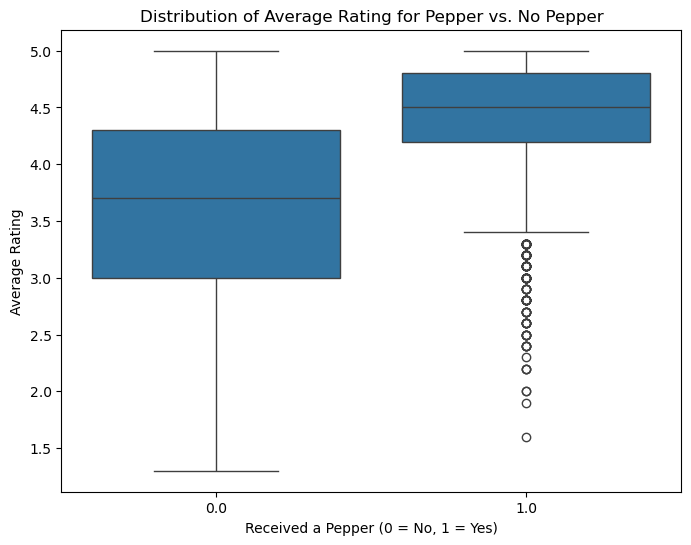

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Received a pepper', y='Average Rating', data=numDat)
plt.title('Distribution of Average Rating for Pepper vs. No Pepper')
plt.xlabel('Received a Pepper (0 = No, 1 = Yes)')
plt.ylabel('Average Rating')
plt.show()

Yes, Pepper (attractiveness of a professor) affects the variance of the distribution of average ratings.

Now we check if there is a correlation between Pepper and Male and Female professors.

In [81]:
# Filter data for male and female professors
male_prof_data = numDat[numDat['Male Professor'] == 1]
female_prof_data = numDat[numDat['Female Professor'] == 1]

# Calculate correlations
male_correlation = male_prof_data['Received a pepper'].corr(male_prof_data['Average Rating'])
female_correlation = female_prof_data['Received a pepper'].corr(female_prof_data['Average Rating'])

# Print results
print(f"Correlation between Received a Pepper and Average Rating (Male Professors): {male_correlation:.4f}")
print(f"Correlation between Received a Pepper and Average Rating (Female Professors): {female_correlation:.4f}")


Correlation between Received a Pepper and Average Rating (Male Professors): 0.4907
Correlation between Received a Pepper and Average Rating (Female Professors): 0.5146


In [82]:
# Filter data for male and female professors
male_prof_data = numDat[numDat['Male Professor'] == 1]
female_prof_data = numDat[numDat['Female Professor'] == 1]

# Calculate proportions for male professors
male_pepper_proportion = male_prof_data['Received a pepper'].mean()  # Proportion of 1s
male_no_pepper_proportion = 1 - male_pepper_proportion  # Proportion of 0s

# Calculate proportions for female professors
female_pepper_proportion = female_prof_data['Received a pepper'].mean()  # Proportion of 1s
female_no_pepper_proportion = 1 - female_pepper_proportion  # Proportion of 0s

# Print results
print(f"Proportion of Male Professors who received a pepper: {male_pepper_proportion:.4f}")
print(f"Proportion of Male Professors who did not receive a pepper: {male_no_pepper_proportion:.4f}")
print(f"Proportion of Female Professors who received a pepper: {female_pepper_proportion:.4f}")
print(f"Proportion of Female Professors who did not receive a pepper: {female_no_pepper_proportion:.4f}")


Proportion of Male Professors who received a pepper: 0.4870
Proportion of Male Professors who did not receive a pepper: 0.5130
Proportion of Female Professors who received a pepper: 0.5230
Proportion of Female Professors who did not receive a pepper: 0.4770


We conclude Pepper is a confound. We will control for the confound and analyze result

#### Controlling for Confounds: Number of Ratings, Average Difficulty, and Pepper are all confounds.

In [106]:
from scipy.stats import levene
import numpy as np
import pandas as pd

# Assuming numDat is loaded with the necessary data

# Calculate median splits for Average Difficulty and Number of ratings
median_difficulty = numDat['Average Difficulty'].median()
median_ratings = numDat['Number of ratings'].median()

# Create stratification groups based on the conditions
numDat.loc[:, 'Difficulty Groups'] = pd.cut(
    numDat['Average Difficulty'],
    bins=[numDat['Average Difficulty'].min(), median_difficulty, numDat['Average Difficulty'].max()],
    labels=[f'Below Median (≤{median_difficulty:.2f})', f'Above Median (> {median_difficulty:.2f})'],
    include_lowest=True
)

numDat.loc[:, 'Ratings Groups'] = pd.cut(
    numDat['Number of ratings'],
    bins=[numDat['Number of ratings'].min(), median_ratings, numDat['Number of ratings'].max()],
    labels=[f'Below Median (≤{median_ratings:.2f})', f'Above Median (> {median_ratings:.2f})'],
    include_lowest=True
)

# Create a combined stratification group
numDat.loc[:, 'Stratification Group'] = (
    numDat['Difficulty Groups'].astype(str) + "_" +
    numDat['Ratings Groups'].astype(str) + "_" +
    numDat['Received a pepper'].astype(str)
)

# Initialize a list to store Levene's test results and effect sizes
levene_results = []

# Get unique stratification groups
stratification_groups = numDat['Stratification Group'].unique()

# Iterate through each stratification group
for group in stratification_groups:
    # Filter data for males and females in the current group
    male_data = numDat[(numDat['Male Professor'] == 1) & (numDat['Stratification Group'] == group)]['Average Rating']
    female_data = numDat[(numDat['Female Professor'] == 1) & (numDat['Stratification Group'] == group)]['Average Rating']
    
    # Calculate sample sizes for the subgroup
    male_sample_size = len(male_data)
    female_sample_size = len(female_data)
    total_sample_size = male_sample_size + female_sample_size
    
    # Ensure both groups have enough data for Levene's test
    if male_sample_size > 1 and female_sample_size > 1:
        stat, p_value = levene(male_data, female_data)
        
        # Calculate Cohen's d for the group
        mean_male = male_data.mean()
        mean_female = female_data.mean()
        std_male = male_data.std()
        std_female = female_data.std()
        pooled_std = np.sqrt(((male_sample_size - 1) * std_male**2 + (female_sample_size - 1) * std_female**2) / (male_sample_size + female_sample_size - 2))
        effect_size = (mean_male - mean_female) / pooled_std
        
        levene_results.append({
            'Stratification Group': group,
            'Levene Stat': stat,
            'P-value': p_value,
            'Significant': p_value < 0.005,  # Using a significance level of 0.005
            'Male Sample Size': male_sample_size,
            'Female Sample Size': female_sample_size,
            'Total Sample Size': total_sample_size,
            'Cohen\'s d': effect_size
        })
    else:
        levene_results.append({
            'Stratification Group': group,
            'Levene Stat': None,
            'P-value': None,
            'Significant': "Insufficient Data",
            'Male Sample Size': male_sample_size,
            'Female Sample Size': female_sample_size,
            'Total Sample Size': total_sample_size,
            'Cohen\'s d': None
        })

# Convert results to a DataFrame
levene_results_df = pd.DataFrame(levene_results)

# Print the results
print("Levene's Test Results with Cohen's d for Male vs. Female within Subgroups:")
print(levene_results_df)


Levene's Test Results with Cohen's d for Male vs. Female within Subgroups:
                               Stratification Group  Levene Stat   P-value  \
0  Above Median (> 2.90)_Above Median (> 15.00)_0.0     1.876821  0.171081   
1  Above Median (> 2.90)_Above Median (> 15.00)_1.0     5.185654  0.023134   
2   Above Median (> 2.90)_Below Median (≤15.00)_0.0     0.102224  0.749244   
3   Below Median (≤2.90)_Above Median (> 15.00)_1.0     1.193524  0.274896   
4   Below Median (≤2.90)_Above Median (> 15.00)_0.0     2.655316  0.103942   
5    Below Median (≤2.90)_Below Median (≤15.00)_0.0     0.072619  0.787636   
6   Above Median (> 2.90)_Below Median (≤15.00)_1.0     2.093211  0.148553   
7    Below Median (≤2.90)_Below Median (≤15.00)_1.0     5.561216  0.018570   

   Significant  Male Sample Size  Female Sample Size  Total Sample Size  \
0        False               472                 328                800   
1        False               342                 246                588 

#### Analysis on Effect Size and Power

We find effect size for the most significant difference (lowest p value) even though this is still not significant with pvalue of .005

Row 7 Below Median (≤2.90)_Below Median (≤15.00)_1.0     5.561216  0.018570 

In [101]:
# Bootstrap to calculate the 95% confidence interval for Cohen's d
bootstrap_effect_sizes = []
n_bootstrap = 1000

if not male_data.empty and not female_data.empty:
    for _ in range(n_bootstrap):
        # Resample data with replacement
        male_sample = np.random.choice(male_data, size=len(male_data), replace=True)
        female_sample = np.random.choice(female_data, size=len(female_data), replace=True)

        # Calculate means and standard deviations for resampled data
        mean_male_sample = np.mean(male_sample)
        mean_female_sample = np.mean(female_sample)
        std_male_sample = np.std(male_sample, ddof=1)
        std_female_sample = np.std(female_sample, ddof=1)

        # Calculate pooled standard deviation
        pooled_std_sample = np.sqrt(
            ((len(male_sample) - 1) * std_male_sample**2 + (len(female_sample) - 1) * std_female_sample**2) /
            (len(male_sample) + len(female_sample) - 2)
        )

        # Calculate Cohen's d for the resampled data
        bootstrap_effect_sizes.append((mean_male_sample - mean_female_sample) / pooled_std_sample)

    # Calculate the confidence interval
    lower_bound = np.percentile(bootstrap_effect_sizes, 2.5)
    upper_bound = np.percentile(bootstrap_effect_sizes, 97.5)

    # Print the results
    print(f"95% Confidence Interval for Cohen's d: [{lower_bound:.4f}, {upper_bound:.4f}]")
else:
    print("No data available for the specified group to perform bootstrap analysis.")



95% Confidence Interval for Cohen's d: [0.0599, 0.3212]


Power for the lowest sig result using the .0599 as effect size  